In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
raw_data = pd.read_csv("D:\\pa\\newstart\\linear regression\\datasets_13720_18513_insurance.csv")
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
raw_data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
raw_data.shape

(1338, 7)

In [10]:
raw_data['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


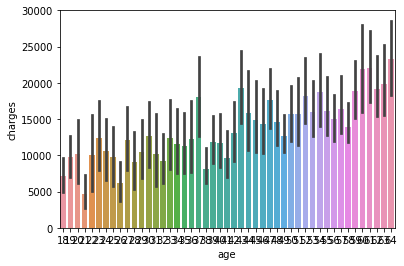

In [12]:
sns.barplot(x = 'age' , y= 'charges', data=raw_data)

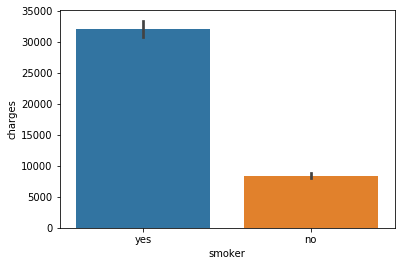

In [13]:
sns.barplot(x = 'smoker' , y= 'charges', data=raw_data)

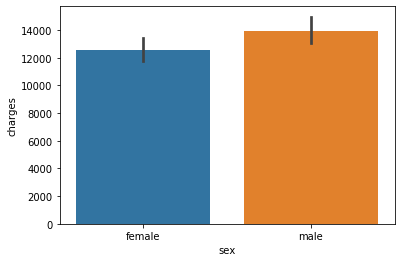

In [14]:
sns.barplot(x = 'sex' , y= 'charges', data=raw_data)

In [15]:
#Check Point
df= raw_data.copy()

In [16]:
# Encoding the data with map function

df['sex'] = raw_data['sex'].map({'female':0,'male':1})
df['smoker'] = raw_data['smoker'].map({'yes':1,'no':0})
df['region'] = raw_data['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

In [17]:
## Label Encoding

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['region'] = lb.fit_transform(df['region'])
df['sex'] = lb.fit_transform(df['sex'])
df['smoker'] = lb.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [18]:
x = df[['age','bmi','children','sex','smoker','region']]
y = df[['charges']]


In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y , test_size = 0.25 , random_state = 0)

In [20]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(x,y)
print('coifient:',lm.coef_)
print('Intercept:',lm.intercept_)
print('Rsquare:',lm.score(x,y))

coifient: [[  256.71095267   340.63404831   473.23995692  -131.18360064
  23861.98003261   369.81634519]]
Intercept: [-13116.00317433]
Rsquare: 0.7508283519755357


In [27]:
new_input = pd.DataFrame({'age':28,'sex':'male','bmi':23.705,'children':0,'smoker':'no','region':'northwest'},index = [0])
new_input
#33	male	22.705	0	no	northwest	21984.47061

,age,sex,bmi,children,smoker,region
0,28,male,23.705,0,no,northwest


In [28]:
#Check Point
df1= new_input.copy()
df1['sex'] = new_input['sex'].map({'female':0,'male':1})
df1['smoker'] = new_input['smoker'].map({'yes':1,'no':0})
df1['region'] = new_input['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})


from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df1['sex'] = lb.fit_transform(df1['sex'])
df1['smoker'] = lb.fit_transform(df1['smoker'])
df1['region'] = lb.fit_transform(df1['region'])
df1

In [29]:
y_pred = lm.predict(df1)
print(y_pred)

[[6370.32341795]]
